In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [32]:
data = pd.read_csv('processed_data.csv')

In [33]:
le_category = LabelEncoder()
le_sub_category = LabelEncoder()
le_sub_sub_category = LabelEncoder()
weekday_encoding = {
    "Monday" : 1,
    "Tuesday" : 2,
    "Wednesday" : 3,
    "Thursday" : 4,
    "Friday" : 5,
    "Saturday" : 6,
    "Sunday" : 7
}

data['Category'] = le_category.fit_transform(data['Category'])
data['Sub-Category'] = le_sub_category.fit_transform(data['Sub-Category'])
data['Sub-Sub-Category'] = le_sub_sub_category.fit_transform(data['Sub-Sub-Category'])
data['Week_Day'] = data['Week_Day'].map(weekday_encoding)

X = data.drop('Label', axis=1)
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


model_names = []
mse_scores = []
r2_scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    model_names.append(model_name)
    mse_scores.append(mse_test)
    r2_scores.append(r2_test)

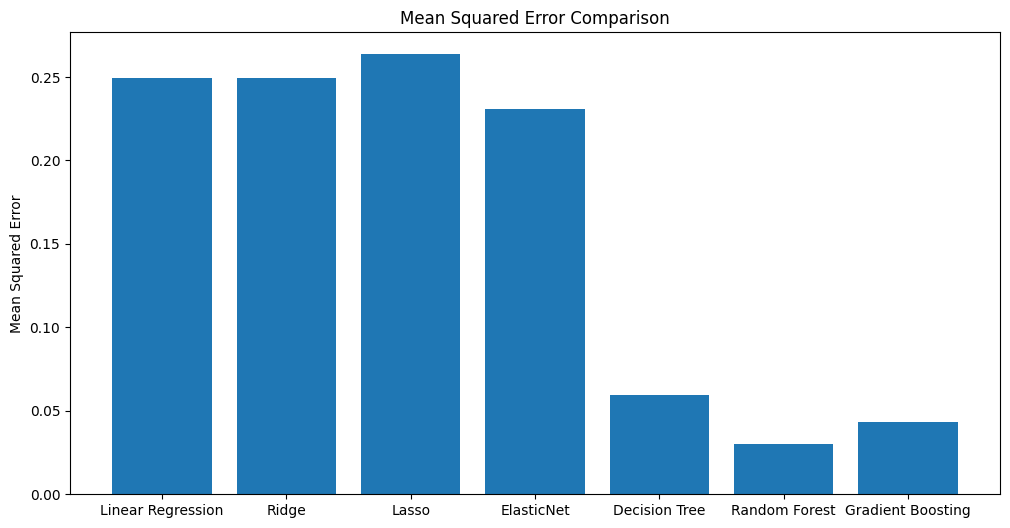

In [34]:
plt.figure(figsize=(12, 6))
plt.bar(model_names, mse_scores)
plt.title("Mean Squared Error Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

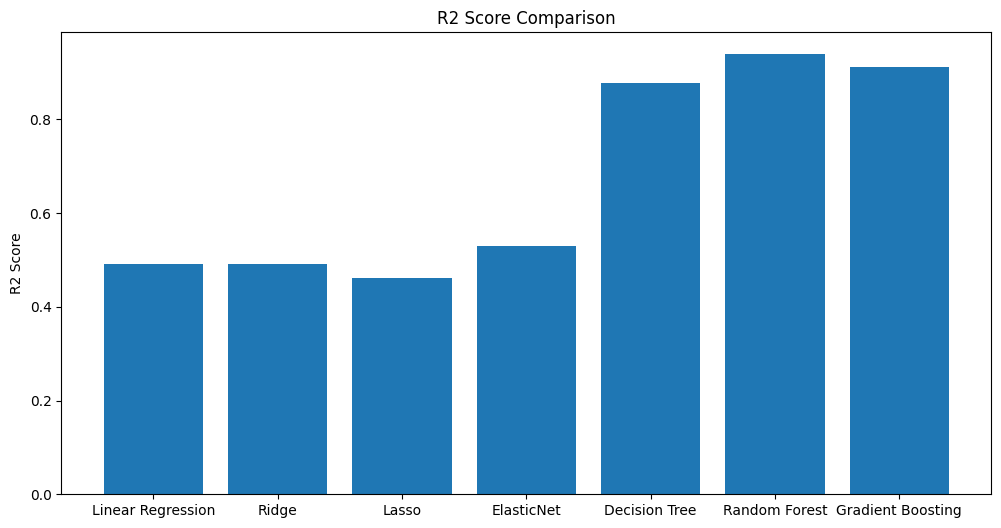

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(model_names, r2_scores)
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.show()